In [23]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plot;
from matplotlib import rcParams;
from matplotlib.cm import rainbow; 
import seaborn as sns;
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

In [24]:
# reading our file heart.csv using pandas
heart_data=pd.read_csv('heart.csv')

In [25]:
# getting shape of our dataset
heart_data.shape

(1025, 14)

In [26]:
# printing first 5 rows
heart_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [27]:
# printing last 5 rows
heart_data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [28]:
# to get a statically summary from each column of dataset
heart_data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [29]:

heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


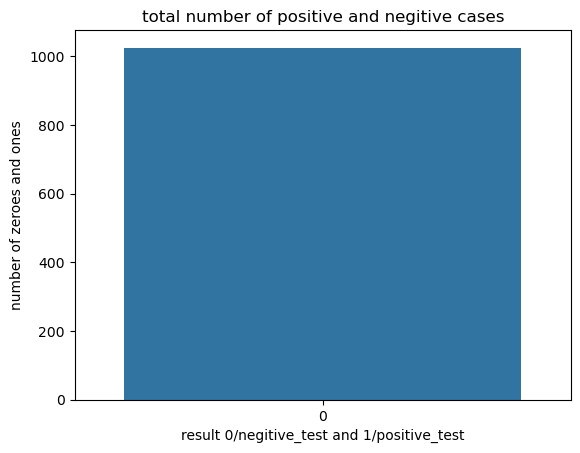

In [30]:
# ploting the number of plositive and negitive tests
# heart_data['target'].value_counts().plot(kind='bar');
sns.countplot(heart_data['target'])
plot.title("total number of positive and negitive cases")
plot.xlabel("result 0/negitive_test and 1/positive_test")
plot.ylabel("number of zeroes and ones")
plot.show();

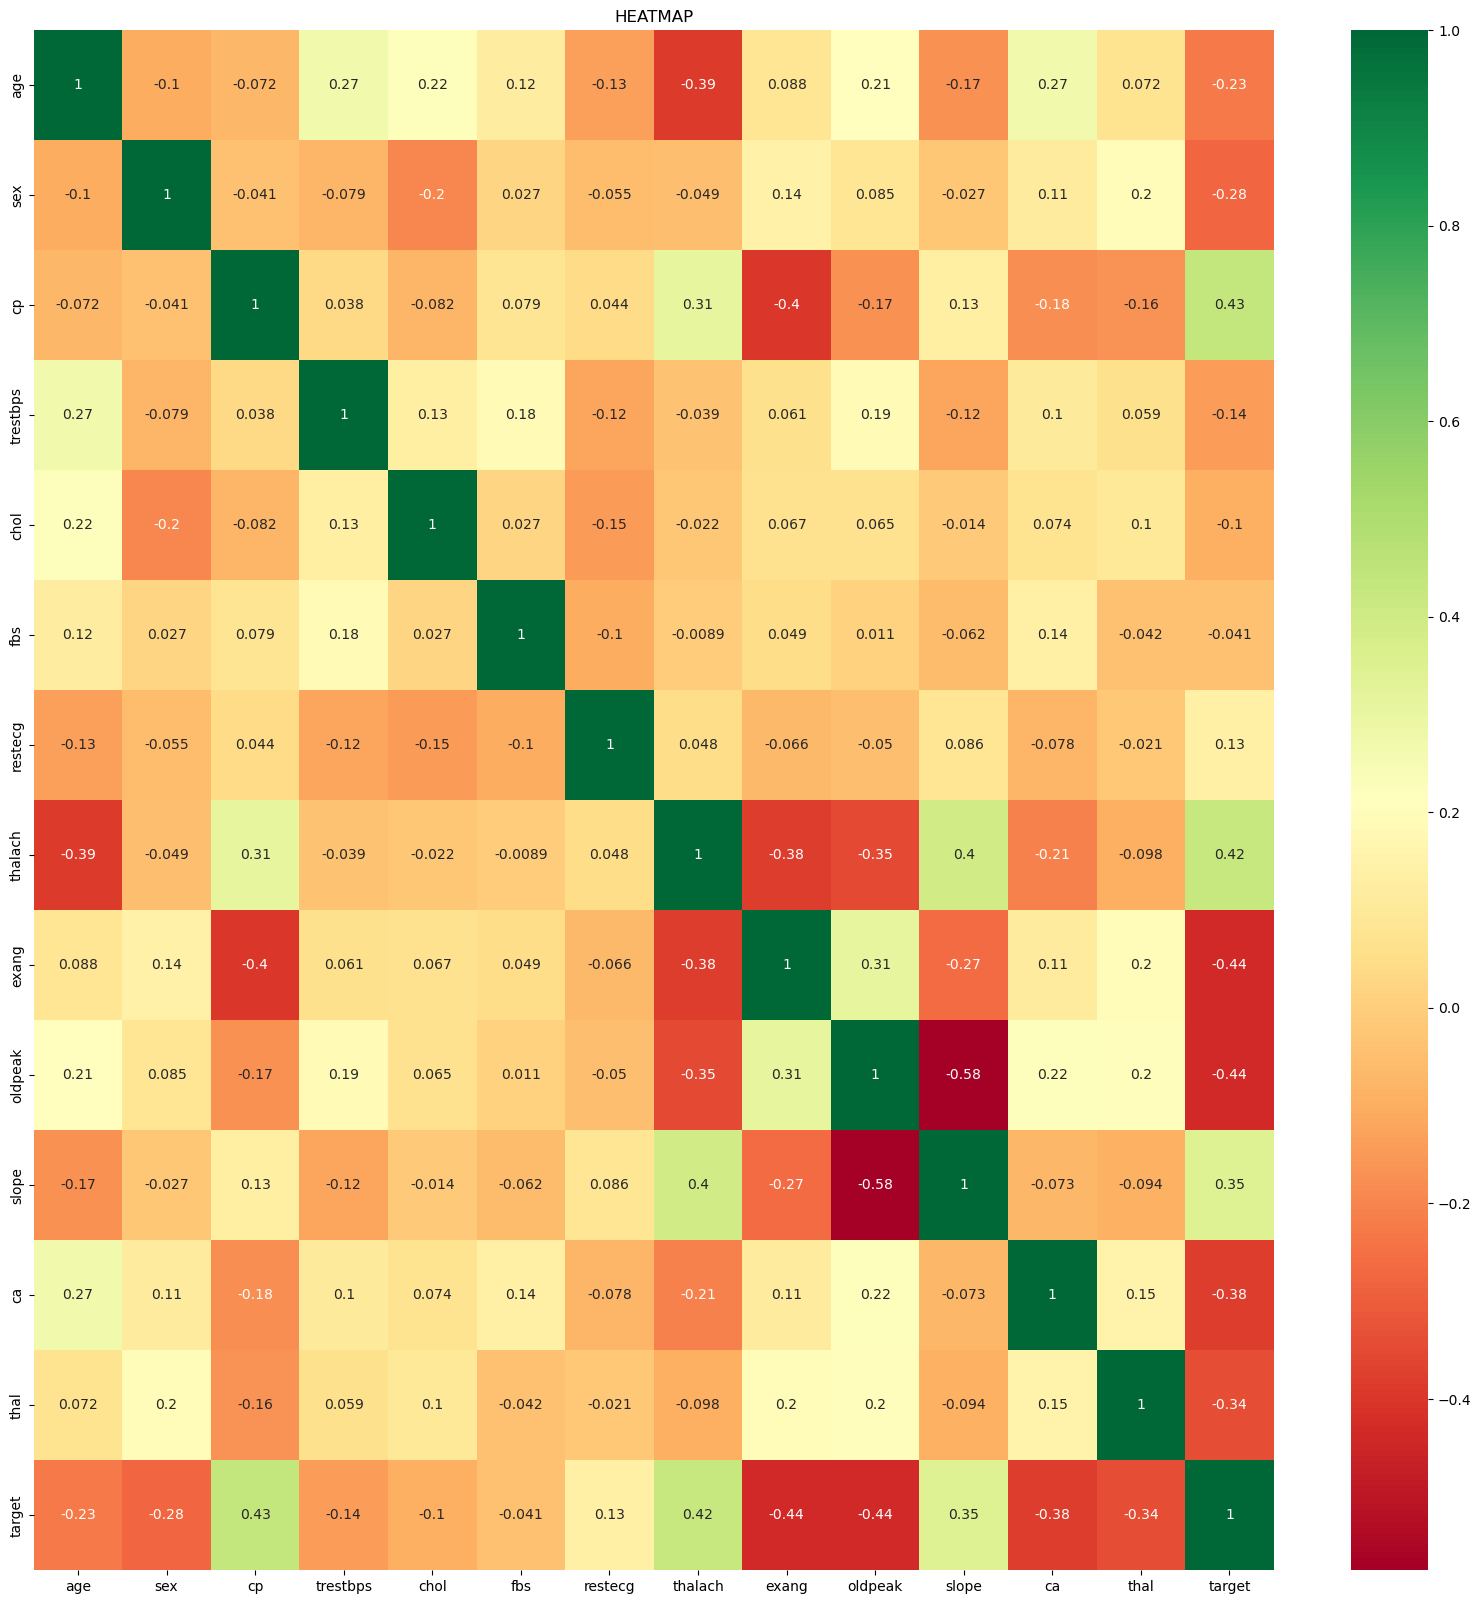

In [39]:
# getting the data summry in form of heatmap
cor=heart_data.corr()
top_corr_feature=cor.index
plot.figure(figsize=(20,20))
sns.heatmap(heart_data[top_corr_feature].corr(),annot=True,cmap="RdYlGn")
plot.title("HEATMAP")
plot.show()

In [41]:
# to train our model we are making a dummy copy of our dataset
temp_data = pd.get_dummies(heart_data,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [42]:
temp_data

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1   cp_0  \
0      52       125   212      168      1.0       0  False   True   True   
1      53       140   203      155      3.1       0  False   True   True   
2      70       145   174      125      2.6       0  False   True   True   
3      61       148   203      161      0.0       0  False   True   True   
4      62       138   294      106      1.9       0   True  False   True   
...   ...       ...   ...      ...      ...     ...    ...    ...    ...   
1020   59       140   221      164      0.0       1  False   True  False   
1021   60       125   258      141      2.8       0  False   True   True   
1022   47       110   275      118      1.0       0  False   True   True   
1023   50       110   254      159      0.0       1   True  False   True   
1024   54       120   188      113      1.4       0  False   True   True   

       cp_1  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
0     False  ...     True  False  False   True  False  False   False   False   
1     False  ...    False   True  False  False  False  False   False   False   
2     False  ...    False   True  False  False  False  False   False   False   
3     False  ...     True  False   True  False  False  False   False   False   
4     False  ...    False  False  False  False   True  False   False   False   
...     ...  ...      ...    ...    ...    ...    ...    ...     ...     ...   
1020   True  ...     True   True  False  False  False  False   False   False   
1021  False  ...    False  False   True  False  False  False   False   False   
1022  False  ...    False  False   True  False  False  False   False   False   
1023  False  ...     True   True  False  False  False  False   False   False   
1024  False  ...    False  False   True  False  False  False   False   False   

      thal_2  thal_3  
0      False    True  
1      False    True  
2      False    True  
3      False    True  
4       True   False  
...      ...     ...  
1020    True   False  
1021   False    True  
1022    True   False  
1023    True   False  
1024   False    True  

[1025 rows x 31 columns]

In [43]:
sc=StandardScaler()
to_scale=['chol','thalach','oldpeak','age','trestbps']
temp_data[to_scale]=sc.fit_transform(temp_data[to_scale])

In [44]:
temp_data.head()
temp_data.tail()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
1020  0.503520  0.479107 -0.484803  0.647366 -0.912329       1  False   True   
1021  0.613800 -0.377636  0.232705 -0.352873  1.471705       0  False   True   
1022 -0.819834 -1.234378  0.562371 -1.353113 -0.060888       0  False   True   
1023 -0.488996 -1.234378  0.155137  0.429923 -0.912329       1   True  False   
1024 -0.047877 -0.663216 -1.124743 -1.570556  0.279688       0  False   True   

       cp_0   cp_1  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  \
1020  False   True  ...     True   True  False  False  False  False   False   
1021   True  False  ...    False  False   True  False  False  False   False   
1022   True  False  ...    False  False   True  False  False  False   False   
1023   True  False  ...     True   True  False  False  False  False   False   
1024   True  False  ...    False  False   True  False  False  False   False   

      thal_1  thal_2  thal_3  
1020   False    True   False  
1021   False   False    True  
1022   False    True   False  
1023   False    True   False  
1024   False   False    True  

[5 rows x 31 columns]

In [47]:
y=temp_data['target']
x=temp_data.drop(['target'],axis=1)

In [48]:
xtrain,xtest,ytrain,ytest=tts(X,y,test_size=0.2,random_state=42)

In [49]:
training_model=MLPClassifier(hidden_layer_sizes=(128,128),max_iter=300)
training_model.fit(xtrain,ytrain)

MLPClassifier(hidden_layer_sizes=(128, 128), max_iter=300)

In [50]:
test_prep=training_model.predict(xtest)

In [51]:
acc=accuracy_score(ytest,test_prep)
print(acc*100)

98.53658536585365


In [52]:
model_name = LinearRegression()

In [69]:
# spliting data into 10 folds,
# dhuffle randomly shuffle the data besore deviding
# 
Spliting = KFold(n_splits=10, shuffle=True, random_state=42)

In [54]:
splited_values = []

In [55]:
for train_index, test_index in Spliting.split(x):
    xtrain, xtest = x[train_index], x[test_index]  
    ytrain, ytest = y[train_index], y[test_index]

KeyError: "None of [Index([   0,    1,    2,    4,    5,    6,    7,    8,    9,   11,\n       ...\n       1014, 1015, 1016, 1017, 1019, 1020, 1021, 1022, 1023, 1024],\n      dtype='int32', length=922)] are in the [columns]"

In [58]:
model_name.fit(xtrain, ytrain)

LinearRegression()

In [62]:
values = model_name.score(xtest, ytest)
splited_values.append(values)

In [63]:
for i, score in enumerate(splited_values):
    print(f"splitted {i+1} Score: {values}")

splitted 1 Score: 0.473879859454602


In [65]:
finalmean_value = np.mean(splited_values)

In [66]:
print(f"mean of cross validation is {finalmean_value}")

mean of cross validation is 0.473879859454602


In [68]:
print((finalmean_value)*(100))

47.3879859454602
